# Multi-Class Text Classification of Conumer Complaints
---

## Preprocessing data 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Consumer_Complaints.csv')

C:\Users\Elias\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#sampling from actual df to avoid a memrory error :) 
df = df.sample(frac=.015, random_state=42, axis=0)
df.shape
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1097580,05/13/2013,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,WELLS FARGO & COMPANY,GA,30309,NaN,NaN,Web,05/14/2013,Closed with explanation,Yes,No,405923
240203,02/12/2018,Debt collection,Credit card debt,Communication tactics,"You told them to stop contacting you, but they...",NaN,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,TX,75034,Older American,Consent not provided,Web,02/12/2018,Closed with explanation,Yes,NaN,2812670
1031486,12/19/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Experian Information Solutions Inc.,FL,347XX,NaN,NaN,Web,12/19/2013,Closed with explanation,Yes,No,639366
1121954,02/15/2013,Mortgage,Home equity loan or line of credit,"Loan servicing, payments, escrow account",NaN,NaN,NaN,OCWEN LOAN SERVICING LLC,VA,22203,NaN,NaN,Web,02/19/2013,Closed with explanation,Yes,No,318321
1197709,03/22/2012,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,HSBC NORTH AMERICA HOLDINGS INC.,NJ,08015,NaN,NaN,Referral,04/13/2012,Closed without relief,Yes,No,39035


In [4]:
from io import StringIO

In [5]:
col = ['Product', 'Consumer complaint narrative']

In [6]:
df = df[col]

In [7]:
df.head()

,Product,Consumer complaint narrative
1097580,Mortgage,NaN
240203,Debt collection,NaN
1031486,Credit reporting,NaN
1121954,Mortgage,NaN
1197709,Mortgage,NaN


In [8]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [9]:
df.head()

,Product,Consumer complaint narrative
207123,"Credit reporting, credit repair services, or o...",There is a collections item listed on my Equif...
348802,"Credit reporting, credit repair services, or o...",Equifax has put myself and my family at risk t...
711765,Bank account or service,When I signed up for my checking account with ...
726933,Student loan,Wells Fargo failed to resolve ny prior complai...
739936,Mortgage,XXXXHuntington National BankXXXX XXXX XXXX XXX...


In [10]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [11]:
df['category_id'] = df['Product'].factorize()[0]

In [12]:
category_id_df =  df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [13]:
category_to_id = dict(category_id_df.values)

In [14]:
id_to_category = dict(category_id_df[['category_id','Product']].values)
id_to_category

{0: 'Credit reporting, credit repair services, or other personal consumer reports',
 1: 'Bank account or service',
 2: 'Student loan',
 3: 'Mortgage',
 4: 'Debt collection',
 5: 'Checking or savings account',
 6: 'Credit reporting',
 7: 'Consumer Loan',
 8: 'Credit card or prepaid card',
 9: 'Credit card',
 10: 'Money transfer, virtual currency, or money service',
 11: 'Vehicle loan or lease',
 12: 'Payday loan',
 13: 'Other financial service',
 14: 'Payday loan, title loan, or personal loan',
 15: 'Prepaid card',
 16: 'Money transfers',
 17: 'Virtual currency'}

In [15]:
df.head()

,Product,Consumer_complaint_narrative,category_id
207123,"Credit reporting, credit repair services, or o...",There is a collections item listed on my Equif...,0
348802,"Credit reporting, credit repair services, or o...",Equifax has put myself and my family at risk t...,0
711765,Bank account or service,When I signed up for my checking account with ...,1
726933,Student loan,Wells Fargo failed to resolve ny prior complai...,2
739936,Mortgage,XXXXHuntington National BankXXXX XXXX XXXX XXX...,3


## Data Visualization

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

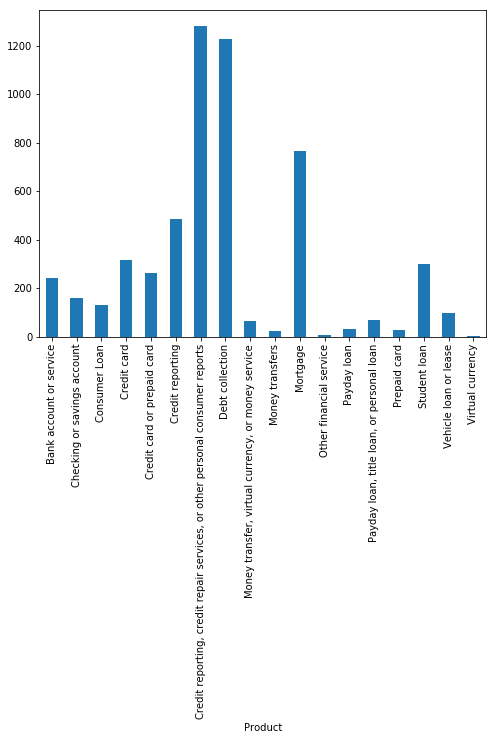

In [17]:
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [18]:
df.describe

<bound method NDFrame.describe of                                                   Product  \
207123  Credit reporting, credit repair services, or o...   
348802  Credit reporting, credit repair services, or o...   
711765                            Bank account or service   
726933                                       Student loan   
739936                                           Mortgage   
67534                                        Student loan   
133376                                    Debt collection   
302393  Credit reporting, credit repair services, or o...   
342821  Credit reporting, credit repair services, or o...   
111876                        Checking or savings account   
226177  Credit reporting, credit repair services, or o...   
331704                                           Mortgage   
686277                                    Debt collection   
125198  Credit reporting, credit repair services, or o...   
82966   Credit reporting, credit repair services, o

In [19]:
df.count()

Product                         5491
Consumer_complaint_narrative    5491
category_id                     5491
dtype: int64

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [22]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()

In [23]:
labels = df.category_id
features.shape

(5491, 15632)

In [24]:
from sklearn.feature_selection import chi2

In [25]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print(" - Most correlated unigrams:\n  .{}".format('\n  .'.join(unigrams[-N:])))
    print(" - Most correlated bigrams:\n  .{}".format('\n  .'.join(bigrams[-N:])))

# 'Bank account or service':
 - Most correlated unigrams:
  .checking
  .bank
 - Most correlated bigrams:
  .debit card
  .checking account
# 'Checking or savings account':
 - Most correlated unigrams:
  .nsf
  .branch
 - Most correlated bigrams:
  .deposited check
  .checking account
# 'Consumer Loan':
 - Most correlated unigrams:
  .vehicle
  .conn
 - Most correlated bigrams:
  .vehicle loan
  .auto finance
# 'Credit card':
 - Most correlated unigrams:
  .costco
  .card
 - Most correlated bigrams:
  .annual fee
  .credit card
# 'Credit card or prepaid card':
 - Most correlated unigrams:
  .express
  .card
 - Most correlated bigrams:
  .american express
  .credit card
# 'Credit reporting':
 - Most correlated unigrams:
  .equifax
  .experian
 - Most correlated bigrams:
  .used verify
  .file used
# 'Credit reporting, credit repair services, or other personal consumer reports':
 - Most correlated unigrams:
  .equifax
  .inquiries
 - Most correlated bigrams:
  .mistakes appear
  .report 

***
## Fitting training set

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'],
                                                    df['Product'], random_state=0)

In [28]:
count_vectorizer = CountVectorizer()

In [29]:
X_train_counts = count_vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [30]:
cld = MultinomialNB().fit(X_train_tfidf, y_train)

***

## Making predictions

### Prediction 1

In [31]:
print(cld.predict(count_vectorizer.transform(['verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine.'])))

['Debt collection']


In [32]:
df[df['Consumer_complaint_narrative'] == 
   "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id


### Prediction 2

In [33]:
print(cld.predict(count_vectorizer.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [34]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id


***

## Model Selection

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [36]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [37]:
CV = 5
cd_df = pd.DataFrame(index=range(CV * len(models))) #20...I think
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The mi

In [38]:
import seaborn as sns

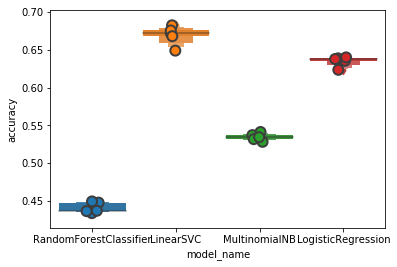

In [39]:
sns.boxenplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=10, jitter=True, edgecolor="gray", 
              linewidth=2)
plt.show()

In [40]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.669633
LogisticRegression        0.635231
MultinomialNB             0.534519
RandomForestClassifier    0.440698
Name: accuracy, dtype: float64

***

## Model Evaluation 

In [41]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

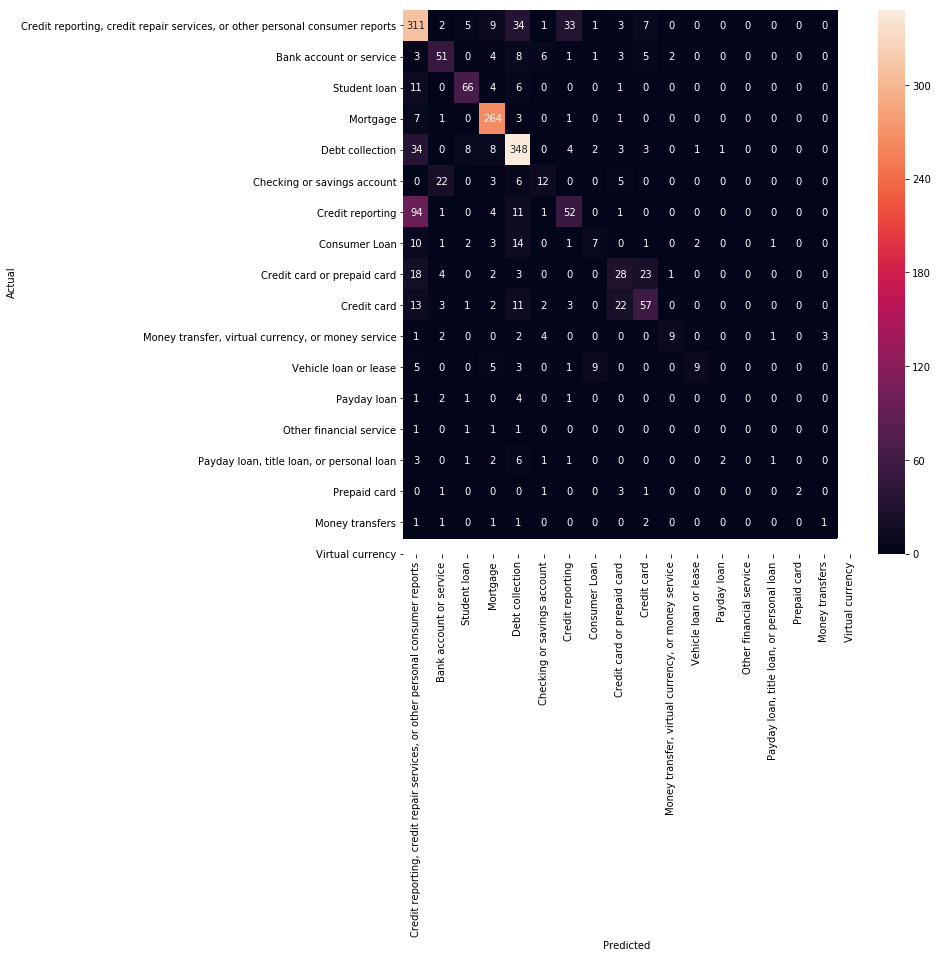

In [42]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d', 
           xticklabels=category_id_df.Product.values,
           yticklabels=category_id_df.Product.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [43]:
from IPython.display import display
col

['Product', 'Consumer complaint narrative']

In [44]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted],
                                                                conf_mat[actual,predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
            print('')

'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 11 examples.


,Product,Consumer_complaint_narrative
241436,Student loan,I have 3 separate loans on my credit report sh...
158357,Student loan,"XX/XX/XXXX, I requested a student loan consoli..."
466000,Student loan,My loan was taken off deferment on XXXX/XXXX/1...
202953,Student loan,I filed disputes for removal cause of missing ...
228361,Student loan,"While enrolled at XXXX XXXX University, my stu..."
361869,Student loan,"XXXX, The last few letters I sent I listed sev..."
128638,Student loan,At the end of XXXX of this year my public and ...
203582,Student loan,I am no longer able to log in to see what I ow...
140052,Student loan,Payments mishandled Got bad info Reducing paym...
127612,Student loan,My loan servicing XXXX XXXX XXXX is not handli...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 34 examples.


,Product,Consumer_complaint_narrative
520237,Debt collection,I had not been supplied with any notification ...
437735,Debt collection,in response to CFPB XXXX XXXX TODAYS ...
396882,Debt collection,I received a notification from the three major...
692059,Debt collection,"Please see disputes : XXXX,XXXX, XXXX, XXXX, X..."
666304,Debt collection,someone has stolen my identity and opened up t...
164636,Debt collection,XXXX XXXX XXXX XXXX violated my rights by not ...
827109,Debt collection,I filed a complaint against Enhanced Recovery ...
74362,Debt collection,I requested a summary in XX/XX/2018 I sent the...
252438,Debt collection,I have know knowledge of this company. I have ...
88405,Debt collection,For over the past year I have been dealing wit...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 94 examples.


,Product,Consumer_complaint_narrative
717703,Credit reporting,never received my report
537343,Credit reporting,I have been watching my credit report on all X...
558410,Credit reporting,"The issue is that Equifax, XXXX, and XXXX have..."
557969,Credit reporting,they say that my info i provided is incorrect ...
783170,Credit reporting,On XX/XX/XXXX I received a call from one of my...
593132,Credit reporting,I contacted the company listed in this dispute...
558450,Credit reporting,I obtained a copy of all XXXX credit bureau re...
671480,Credit reporting,I have XXXX negative marks against my credit f...
662673,Credit reporting,Before XXXX purchased this student loan from X...
658840,Credit reporting,I have initiated several disputes with this cr...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 10 examples.


,Product,Consumer_complaint_narrative
780186,Consumer Loan,Facts pertaining to Capital One Auto Finance O...
531058,Consumer Loan,I requested contracts bearing my signature and...
776300,Consumer Loan,Dispute late payment on BMW lease account.
611745,Consumer Loan,I am writing to you requesting assistance with...
621617,Consumer Loan,I bought furniture through Conn 's and finance...
722862,Consumer Loan,I have a loan out with Navy Federal Credit Uni...
604796,Consumer Loan,XXXX APPLIED FOR A LOAN WITH 1St FRANKIN FINAN...
481619,Consumer Loan,I have been a long time customer of Conn 's wi...
640632,Consumer Loan,I used XXXX to view my credit score for free. ...
626500,Consumer Loan,My name is XXXX XXXX my husband XXXX XXXX fina...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 18 examples.


,Product,Consumer_complaint_narrative
119938,Credit card or prepaid card,"In XX/XX/2018, I started receiving prepaid cre..."
118641,Credit card or prepaid card,Working with American Express to resolve an er...
433813,Credit card or prepaid card,This card is like the other. It was set up wit...
358543,Credit card or prepaid card,Below is a response from CITICARDS. \n\nWe are...
395915,Credit card or prepaid card,Bank of America has charged interest on my acc...
390779,Credit card or prepaid card,I have been making payments through my credit ...
60419,Credit card or prepaid card,I have a closed account showing on my credit r...
41221,Credit card or prepaid card,On XX/XX/XXXX there was a credit inquiry that ...
251646,Credit card or prepaid card,The online login/encryption process for XXXX X...
107420,Credit card or prepaid card,Equifax has been non-compliant with removing t...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 13 examples.


,Product,Consumer_complaint_narrative
514481,Credit card,I was shocked when I reviewed my credit report...
455500,Credit card,I have been a consumer with Kohl 's since XX/X...
473140,Credit card,XXXX is reporting a dispute that I had already...
810863,Credit card,I have a capital one credit card account that ...
610757,Credit card,opened an account back in XXXX XXXX and filed ...
651023,Credit card,I just got off the phone with a certain XXXX X...
787553,Credit card,I request that the CFPB investigate Citi 's fa...
488347,Credit card,On XX/XX/2017 my bank issued a paper check in ...
673569,Credit card,The Chase account has been reporting on my per...
477502,Credit card,I have a Kohls credit card. the balance on it ...


IndexError: index 17 is out of bounds for axis 0 with size 17

In [45]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . debit
  . Top bigrams:
       . checking account
       . debit card
# 'Checking or savings account':
  . Top unigrams:
       . banking
       . nsf
  . Top bigrams:
       . account wells
       . bank xx
# 'Consumer Loan':
  . Top unigrams:
       . lease
       . conn
  . Top bigrams:
       . voluntary repossession
       . financial services
# 'Credit card':
  . Top unigrams:
       . card
       . kohl
  . Top bigrams:
       . credit card
       . 00 xxxx
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . purchase
  . Top bigrams:
       . charges credit
       . american express
# 'Credit reporting':
  . Top unigrams:
       . experian
       . equifax
  . Top bigrams:
       . xxxx bank
       . xxxx accounts
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . inquiries
       . showing
  . Top bigrams:
       . xxxx xxxx
      

In [49]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, labels = labels, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.61      0.77      0.68       406
                                                     Bank account or service       0.61      0.77      0.68       406
                                                                Student loan       0.56      0.61      0.58        84
                                                                    Mortgage       0.78      0.75      0.76        88
                                                             Debt collection       0.85      0.95      0.90       277
                                                 Checking or savings account       0.78      0.75      0.76        88
                                                            Credit reporting       0.75      0.84      0.80       412
                                                       

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1537: UserWarning: labels size, 5491, does not match size of target_names, 18
  .format(len(labels), len(target_names))
C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\metrics\classifica